# Negative Volume Index (NVI)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:negative_volume_inde

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900


In [3]:
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)) * 100
df['ROC_Volume'] = ((df['Volume'] - df['Volume'].shift(1))/df['Volume'].shift(1)) * 100
df['NVI_Value'] = 0
df['NVI_Cumulative'] = 0
df1 = df[df['ROC_Volume']<0]
df1['NVI_Value'] = df1['ROC']
df[df['ROC_Volume']<0] = df1
df['NVI_Cumulative'] = 1000+df['NVI_Value'].cumsum()

In [4]:
# Drop Columns
df = df.drop(['ROC','ROC_Volume'],axis=1)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,NVI_Value,NVI_Cumulative
Date,,,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900,0.000000,1000.000000
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,999.888083
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.000000,999.888083
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,0.000000,999.888083
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.000000,999.888083


In [6]:
import talib as ta

In [7]:
df['EMA_100'] = ta.EMA(df['Adj Close'], timeperiod=100)
df['EMA_255'] = ta.EMA(df['Adj Close'], timeperiod=255)
df['NVI_100'] = ta.EMA(df['NVI_Cumulative'], timeperiod=100)
df['NVI_255'] = ta.EMA(df['NVI_Cumulative'], timeperiod=255)

Text(0.5,0,'Date')

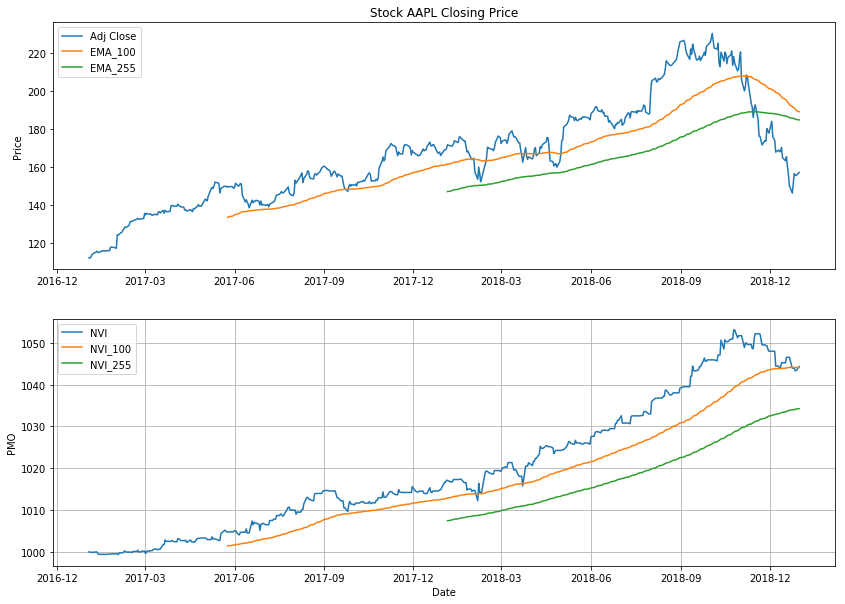

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(df['EMA_100'])
ax1.plot(df['EMA_255'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['NVI_Cumulative'], label='NVI')
ax2.plot(df['NVI_100'])
ax2.plot(df['NVI_255'])
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('NVI')
ax2.set_xlabel('Date')

## Candlestick with NVI

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NVI_Value,NVI_Cumulative,EMA_100,EMA_255,NVI_100,NVI_255,VolumePositive
0,736332.0,115.800003,116.330002,114.760002,116.150002,112.140007,28781900,0.000000,1000.000000,NaN,NaN,NaN,NaN,False
1,736333.0,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,-0.111917,999.888083,NaN,NaN,NaN,NaN,False
2,736334.0,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,0.000000,999.888083,NaN,NaN,NaN,NaN,False
3,736335.0,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,0.000000,999.888083,NaN,NaN,NaN,NaN,False
4,736338.0,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,0.000000,999.888083,NaN,NaN,NaN,NaN,False


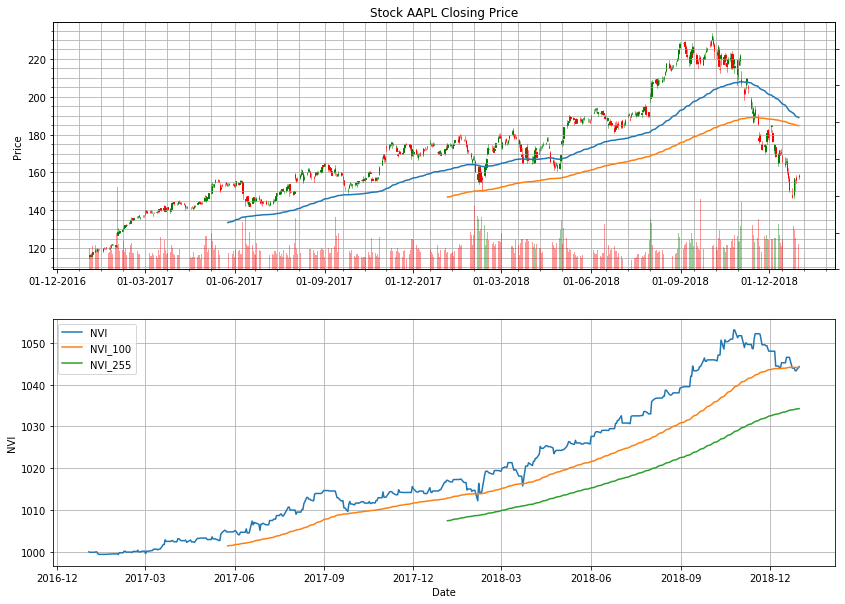

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['EMA_100'])
ax1.plot(df['EMA_255'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax2.legend(loc='best')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['NVI_Cumulative'], label='NVI')
ax2.plot(df['NVI_100'])
ax2.plot(df['NVI_255'])
ax2.grid()
ax2.set_ylabel('NVI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')